In [1]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import umap
import scipy
import math

In [2]:
#Get well level data, obtained by running downstream analysis
well_data_pd = pd.read_csv('well_level_data_efn128precomp_cpcells_1-6EMPTY_m6w.csv')
columns = [str(i) for i in range(6400)]
well_data = well_data_pd[columns].to_numpy()
well_data_pd

,Plate,Well,pert_name,Replicate,broad_sample,0,1,2,3,4,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,41744,a01,EMPTY_,1,NaN,0.011115,-0.000924,-0.189411,-0.125762,0.011531,...,0.030769,-0.188998,0.105103,-0.020442,0.200033,0.075724,-0.003524,0.058962,0.077639,-0.654853
1,41744,a02,EMPTY_,2,NaN,0.036719,0.032033,0.133030,0.227463,-0.002505,...,0.057862,-0.347326,0.069724,-0.049677,-0.062946,0.391009,-0.009726,-0.012047,0.122894,-0.173644
2,41744,a03,ATF4_WT.1,1,ccsbBroad304_00117,-2.287672,2.892413,-11.076834,-10.267089,-4.329243,...,9.107317,10.619679,-7.429898,-2.163285,-13.450211,-17.661134,-3.328748,-7.882437,-11.695092,-73.335191
3,41744,a04,TSC2_WT,1,ccsbBroad304_07101,1.099881,-6.094728,-5.746928,1.181729,-2.087018,...,2.603937,-18.034465,-1.242947,-0.556383,-4.490376,0.821681,0.096154,1.466532,2.300763,0.619224
4,41744,a05,BAX_WT,1,ccsbBroad304_00150,-1.955966,0.510188,-1.613211,-4.149652,-0.976146,...,1.682711,-12.515278,3.430879,1.902399,-17.543060,-2.276646,-0.474130,-4.878094,-0.263229,-16.680060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,41757,p20,eGFP_CTRL,40,NaN,-1.267970,-1.403143,-6.163752,-0.024864,3.565720,...,1.918513,-15.393773,-3.119248,-0.036215,-3.888439,0.994887,0.345466,1.310040,0.795310,7.758859
1910,41757,p21,EMPTY_,172,NaN,0.001270,0.095476,0.179005,0.141422,0.016689,...,-0.103462,0.283706,-0.126741,-0.089007,0.170820,-0.072490,0.026422,-0.018879,-0.000490,0.337248
1911,41757,p22,EMPTY_,173,NaN,-0.067739,-0.039443,-0.112080,-0.252204,0.036568,...,0.072012,0.113703,0.043237,-0.020539,0.025316,0.068288,-0.002521,-0.006530,-0.054346,-0.430209
1912,41757,p23,EMPTY_,174,NaN,0.027029,-0.010552,0.351884,-0.121419,-0.012122,...,-0.033563,0.217538,0.333218,-0.003904,0.049795,-0.523484,0.015155,-0.053692,0.036749,0.146622


# Run PCA

In [3]:
pca = PCA(.95)
pca = pca.fit(well_data)
pca_result = pca.transform(well_data)
useful_components = len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.005])

<BarContainer object of 32 artists>

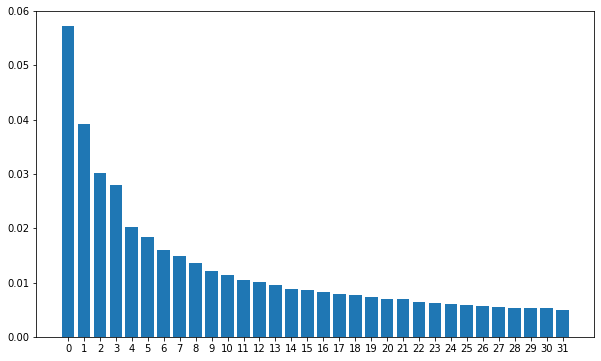

In [4]:
plt.figure(figsize=(10,6))
plt.xticks(range(useful_components))
plt.bar(height = pca.explained_variance_ratio_[:useful_components], x = range(len(pca.explained_variance_ratio_[:useful_components])))

In [5]:
b = well_data_pd[['Plate', 'Well', 'pert_name']].to_numpy()
a = np.column_stack((b, pca_result))[:,0:useful_components+3]

In [6]:
columns_pca = ['PCA ' + str(i) for i in range(1,useful_components+1)]
principalDf = pd.DataFrame(data = a, columns = ['Plate', 'Well', 'pert_name'] + columns_pca)
principalDf['control'] = principalDf['pert_name'] == 'EMPTY_'
for i in range(1, useful_components+1):
    principalDf['PCA {}'.format(i)] = principalDf['PCA {}'.format(i)].astype('float32')

<Figure size 864x864 with 0 Axes>

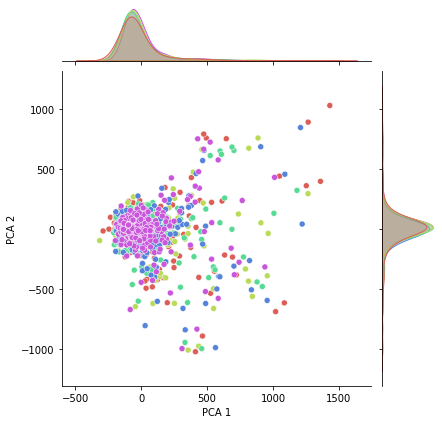

<Figure size 864x864 with 0 Axes>

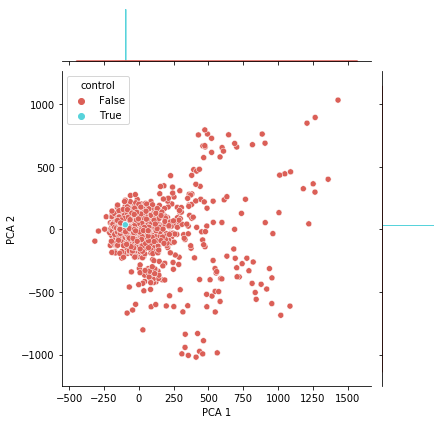

<Figure size 864x864 with 0 Axes>

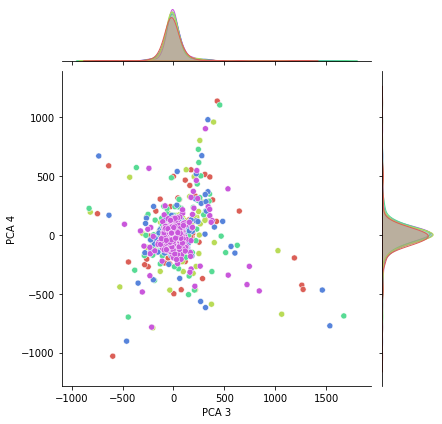

<Figure size 864x864 with 0 Axes>

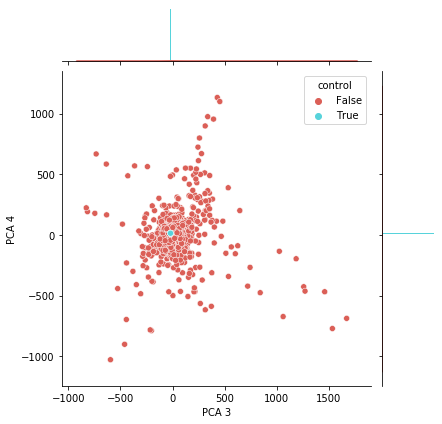

<Figure size 864x864 with 0 Axes>

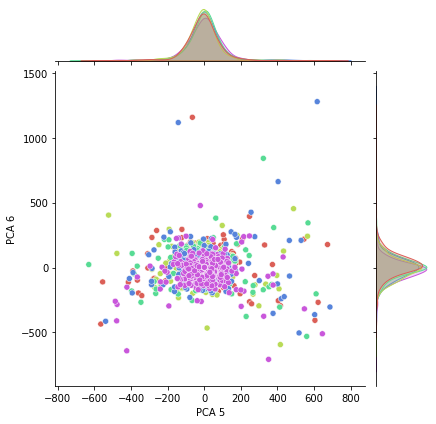

<Figure size 864x864 with 0 Axes>

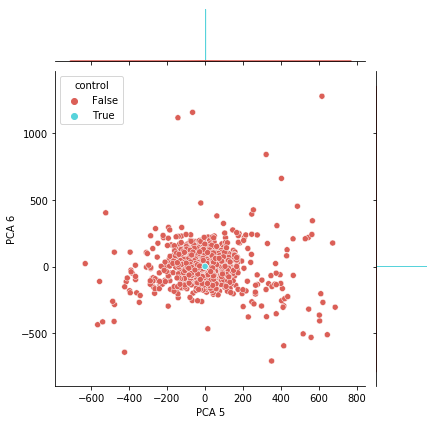

<Figure size 864x864 with 0 Axes>

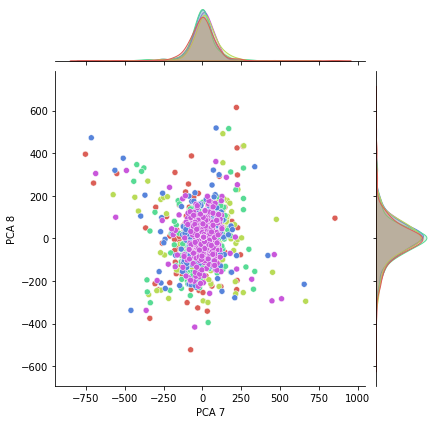

<Figure size 864x864 with 0 Axes>

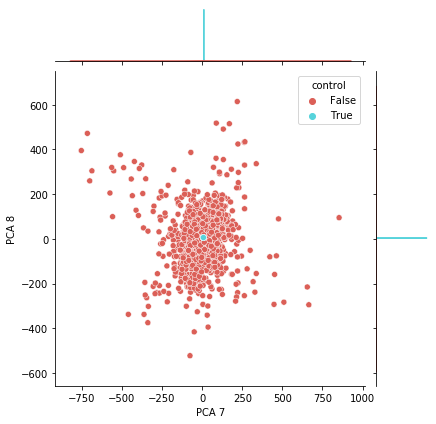

<Figure size 864x864 with 0 Axes>

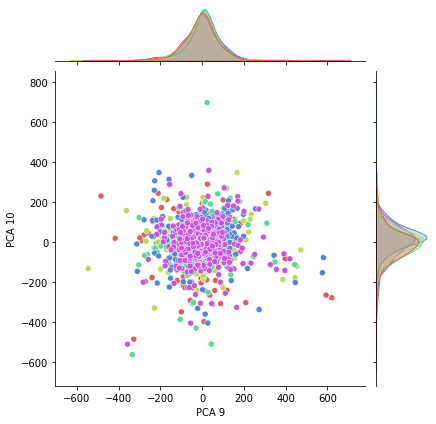

<Figure size 864x864 with 0 Axes>

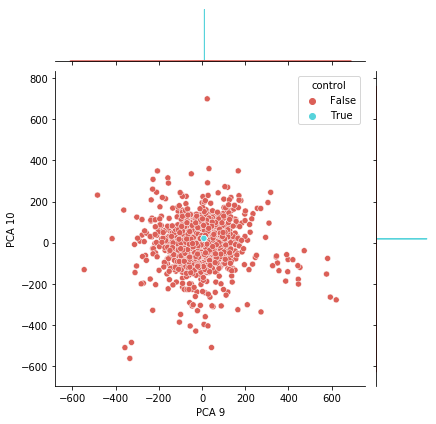

<Figure size 864x864 with 0 Axes>

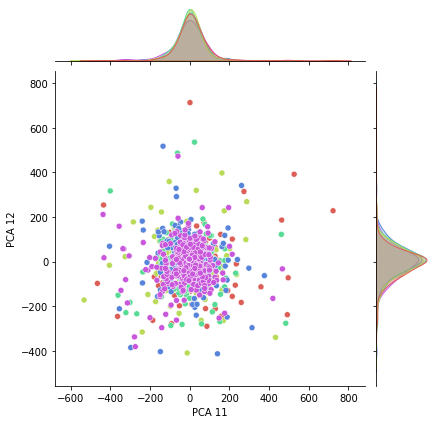

<Figure size 864x864 with 0 Axes>

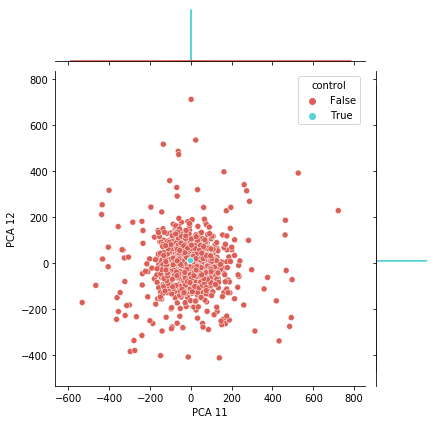

<Figure size 864x864 with 0 Axes>

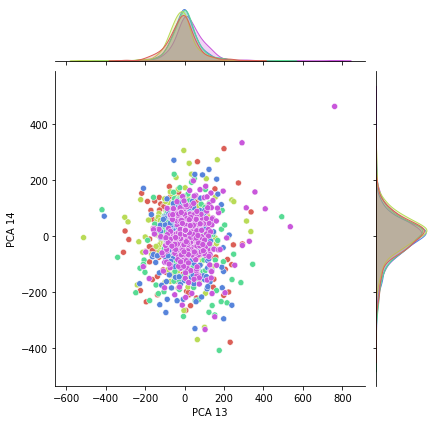

<Figure size 864x864 with 0 Axes>

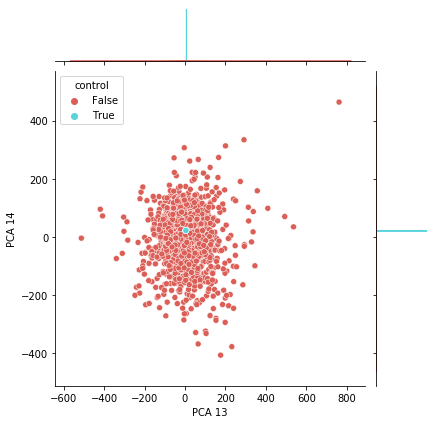

<Figure size 864x864 with 0 Axes>

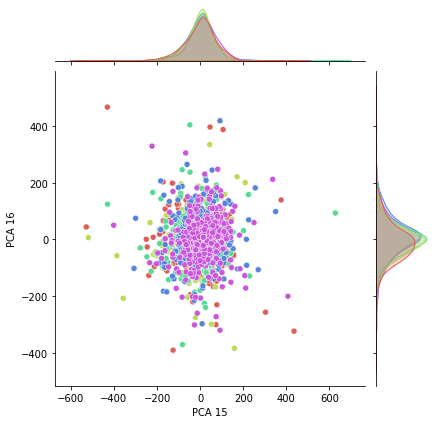

<Figure size 864x864 with 0 Axes>

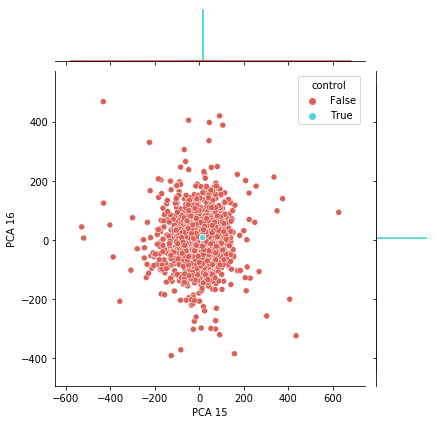

<Figure size 864x864 with 0 Axes>

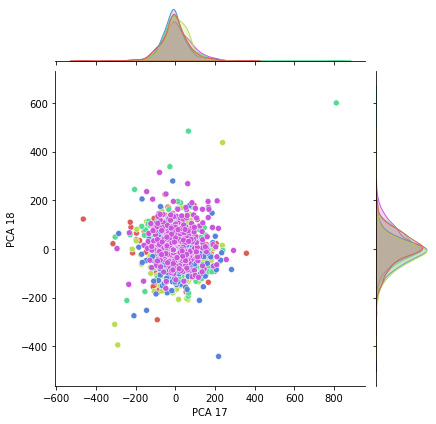

<Figure size 864x864 with 0 Axes>

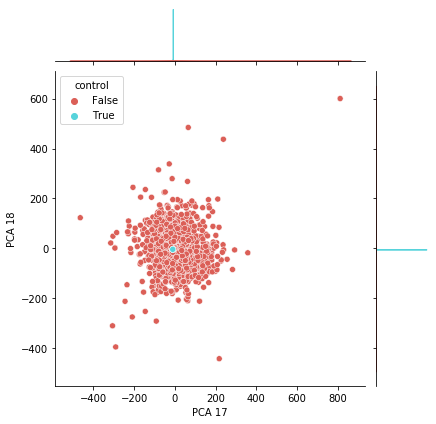

<Figure size 864x864 with 0 Axes>

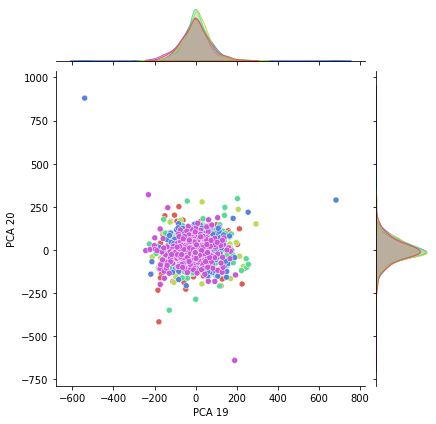

<Figure size 864x864 with 0 Axes>

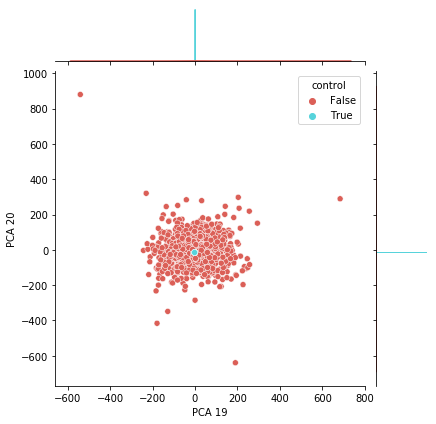

<Figure size 864x864 with 0 Axes>

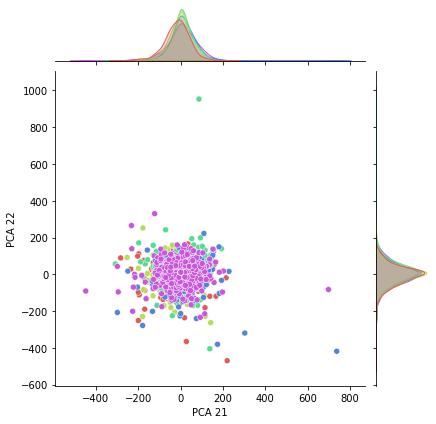

<Figure size 864x864 with 0 Axes>

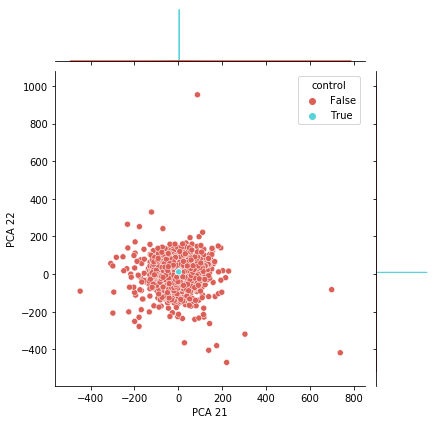

<Figure size 864x864 with 0 Axes>

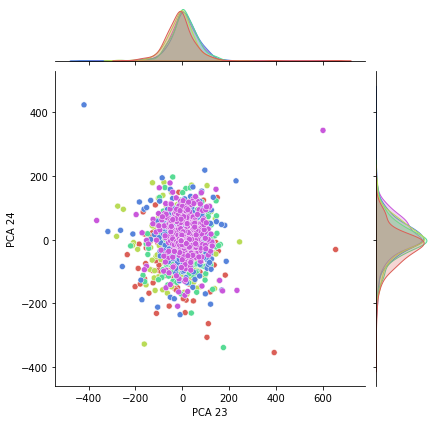

<Figure size 864x864 with 0 Axes>

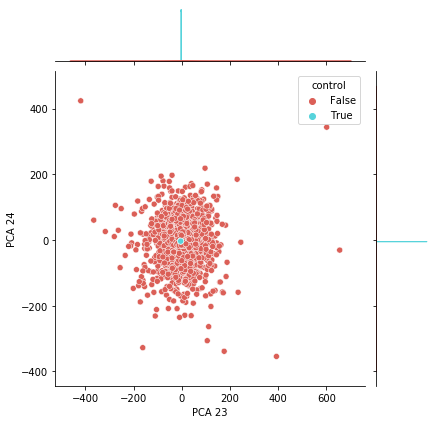

<Figure size 864x864 with 0 Axes>

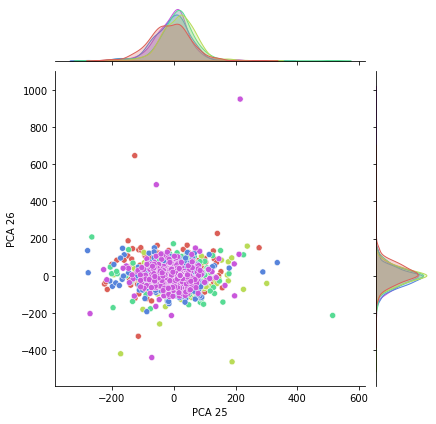

<Figure size 864x864 with 0 Axes>

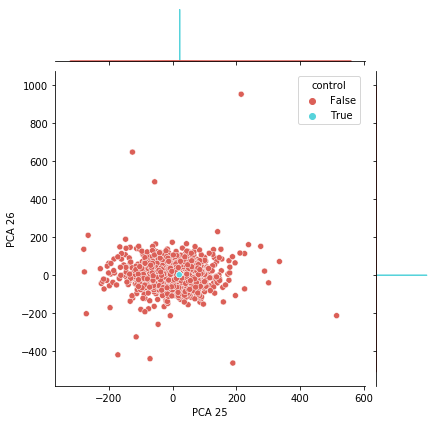

<Figure size 864x864 with 0 Axes>

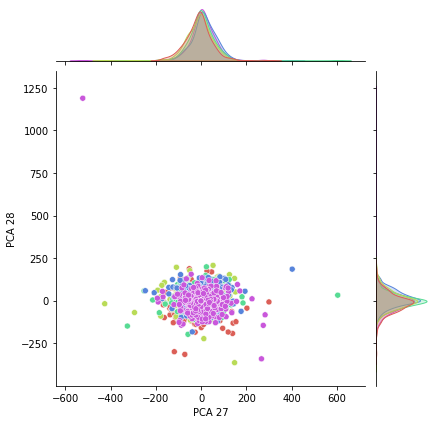

<Figure size 864x864 with 0 Axes>

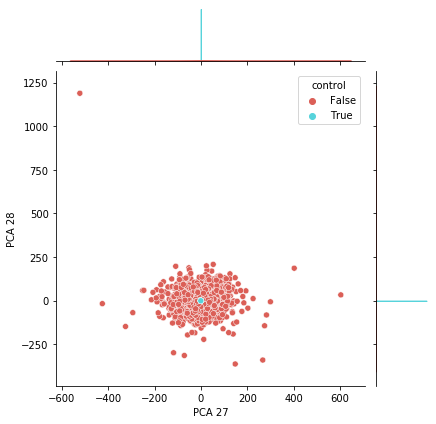

<Figure size 864x864 with 0 Axes>

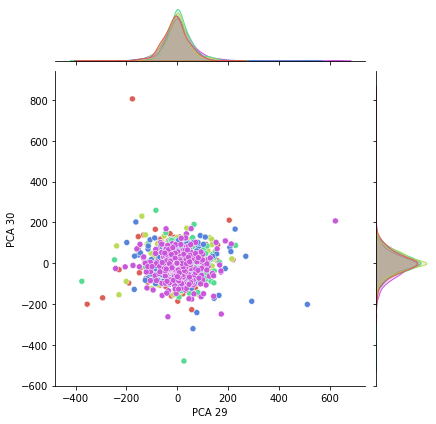

<Figure size 864x864 with 0 Axes>

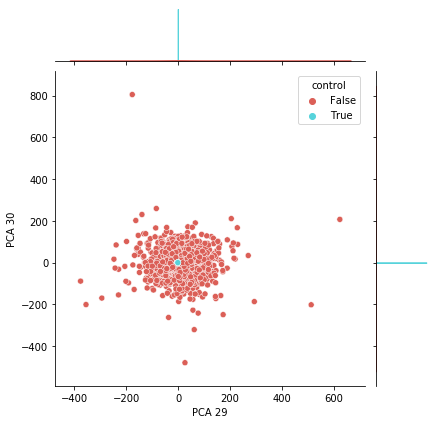

<Figure size 864x864 with 0 Axes>

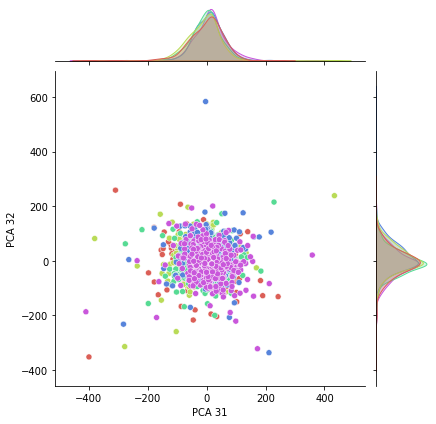

<Figure size 864x864 with 0 Axes>

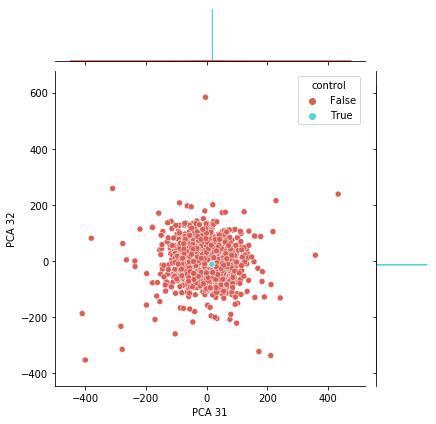

In [7]:
to_plot = useful_components - useful_components % 2
for i in range(1, to_plot, 2):
    plt.figure(figsize=(12,12))
    color = sb.color_palette("hls", 5)
    sb.jointplot(data = principalDf, x="PCA {}".format(i), y="PCA {}".format(i+1), palette=color, hue = 'Plate', legend=False)
    plt.show()
    plt.figure(figsize=(12,12))
    color = sb.color_palette("hls", 2)
    sb.jointplot(data = principalDf, x="PCA {}".format(i), y="PCA {}".format(i+1), palette=color, hue = 'control')
    plt.show()

# Run UMAP

In [8]:
reducer = umap.UMAP()
embeddings = reducer.fit_transform(well_data)
principalDf = pd.concat((pd.DataFrame(embeddings, columns=["UMAP 1", "UMAP 2"]), principalDf.reset_index(drop=True)), axis=1)

In [9]:
principalDf.reset_index(drop=True, inplace = True)

<Figure size 864x864 with 0 Axes>

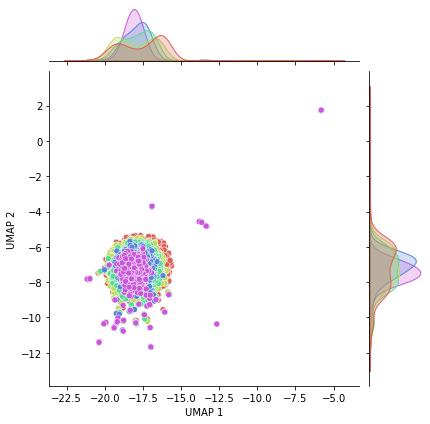

<Figure size 864x864 with 0 Axes>

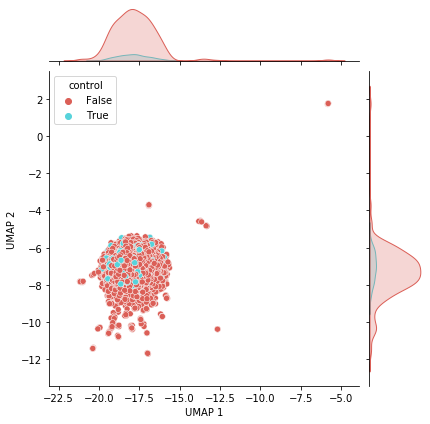

In [10]:
plt.figure(figsize=(12,12))
color = sb.color_palette("hls", 5)
sb.jointplot(data = principalDf, x="UMAP 1", y="UMAP 2", palette=color, hue = 'Plate', legend = False)
plt.figure(figsize=(12,12))
color = sb.color_palette("hls", 2)
sb.jointplot(data = principalDf, x="UMAP 1", y="UMAP 2", palette=color, hue = 'control')

# Calculate correlations of individiaul wells vs median plate profile of EMPTY control

In [11]:
median_controls = well_data_pd[well_data_pd['pert_name'] == 'EMPTY_'].drop(columns=['pert_name','Replicate']).groupby(["Plate"]).median().reset_index()

In [12]:
correlations_df = pd.DataFrame(columns=['Plate', 'Well', 'pert_name', 'Replicate', 'control_corr'])
for i in tqdm(well_data_pd.index):
    well_profile = well_data_pd.loc[i, columns].to_numpy()
    plate_control_profile = median_controls[median_controls['Plate'] == well_data_pd.loc[i, 'Plate']][columns].to_numpy()[0]
    correlations_df.loc[i] = [  well_data_pd.loc[i, 'Plate'],  well_data_pd.loc[i, 'Well'],  well_data_pd.loc[i, 'pert_name'],  well_data_pd.loc[i, 'Replicate'], scipy.stats.pearsonr(well_profile, plate_control_profile)[0] ]

100%|██████████| 1914/1914 [00:40<00:00, 46.91it/s]


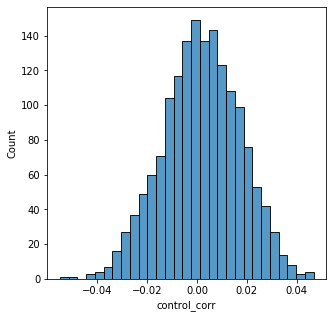

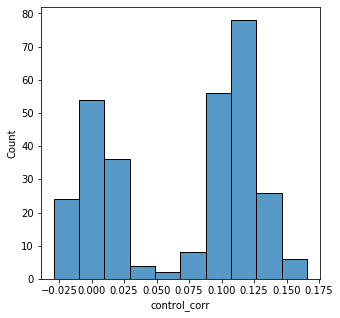

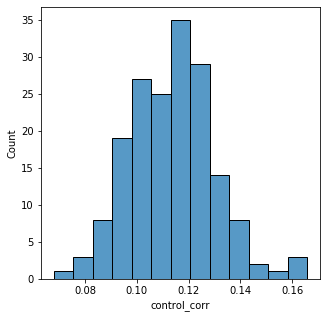

In [13]:
#plot distribution of correlations without controls
plt.figure(figsize=(5,5))
sb.histplot(correlations_df[~correlations_df['pert_name'].isin(['EMPTY_', 'Luciferase_CTRL', 'LacZ_CTRL', 'eGFP_CTRL'])]['control_corr'])
plt.figure(figsize=(5,5))
sb.histplot(correlations_df[correlations_df['pert_name'].isin(['EMPTY_', 'Luciferase_CTRL', 'LacZ_CTRL', 'eGFP_CTRL'])]['control_corr'])
plt.figure(figsize=(5,5))
sb.histplot(correlations_df[correlations_df['pert_name'].isin(['EMPTY_'])]['control_corr'])

In [14]:
principalDf = pd.merge(correlations_df, principalDf, right_on = ['Plate', 'Well', 'pert_name'], left_on = ['Plate', 'Well', 'pert_name'] )
principalDf

,Plate,Well,pert_name,Replicate,control_corr,UMAP 1,UMAP 2,PCA 1,PCA 2,PCA 3,...,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,PCA 31,PCA 32,control
0,41744,a01,EMPTY_,1,0.111551,-15.844452,-7.470954,-96.485199,36.374084,-19.322226,...,-3.360895,20.617926,1.419513,-0.836665,-1.560211,-1.098556,0.074597,17.569559,-11.610761,True
1,41744,a02,EMPTY_,2,0.105450,-15.905999,-7.825672,-96.468407,36.343204,-19.330019,...,-3.369405,20.612865,1.421879,-0.844445,-1.548170,-1.091180,0.085212,17.548742,-11.594106,True
2,41744,a03,ATF4_WT.1,1,-0.043232,-15.884564,-7.741980,-19.998596,101.968460,251.573074,...,-208.377853,-93.478638,106.857521,-67.232010,-29.856203,29.550770,66.472290,-164.174713,-124.780968,False
3,41744,a04,TSC2_WT,1,-0.018040,-16.065119,-7.438295,-219.057907,-9.035419,21.589430,...,-102.497566,-32.387264,65.208458,-17.638235,-63.928860,-74.209244,56.745674,-33.038654,16.416035,False
4,41744,a05,BAX_WT,1,-0.003973,-16.337942,-8.305060,-73.753609,-10.839851,-98.262352,...,-43.227100,-25.175131,58.092758,-137.140793,-83.051132,-1.581333,43.736839,-72.912086,-4.469955,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,41757,p20,eGFP_CTRL,40,0.027516,-18.434103,-7.483761,-22.491070,-12.534127,3.039798,...,-103.883324,-61.276760,-3.954985,-104.241104,38.467922,-8.385157,24.734859,15.492086,56.533772,False
1910,41757,p21,EMPTY_,172,0.086218,-17.500835,-6.105670,-96.485085,36.377281,-19.334324,...,-3.345809,20.632032,1.423128,-0.830460,-1.550333,-1.077196,0.084274,17.564339,-11.605061,True
1911,41757,p22,EMPTY_,173,0.088982,-17.785797,-6.806223,-96.490486,36.356876,-19.296940,...,-3.355553,20.621733,1.414811,-0.829522,-1.542732,-1.097924,0.064680,17.576908,-11.608851,True
1912,41757,p23,EMPTY_,174,0.116757,-18.855080,-6.906477,-96.499756,36.363914,-19.299360,...,-3.371279,20.633930,1.440136,-0.853073,-1.545750,-1.107917,0.065000,17.562860,-11.606956,True


# Selection of the candidates based on PCA

In [16]:
plates_wells = []
for pca_c in range(1,useful_components+1):
    median_pca = principalDf[principalDf['pert_name']=='EMPTY_']['PCA {}'.format(pca_c)].median()
    temp = []
    for i in principalDf.index:
        temp.append(abs(median_pca - principalDf.loc[i, 'PCA {}'.format(pca_c)]))
    
    idx = (-np.array(temp)).argsort()[:int(round(len(temp)*pca.explained_variance_ratio_[pca_c-1]))]
    for idd in idx:
        plates_wells.append((principalDf.loc[idd, 'Plate'], principalDf.loc[idd, 'Well'] )) 

In [17]:
len(set(plates_wells))

229

# Selection of the candidates based on UMAP

(array([ 64., 174., 260., 329., 339., 305., 204.,  53.,  29.,  10.,  32.,
         32.,  25.,   8.,   0.,   6.,  29.,   0.,   0.,   0.,   5.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  10.]),
 array([7.62287248e-03, 3.06504076e-01, 6.05385279e-01, 9.04266483e-01,
        1.20314769e+00, 1.50202889e+00, 1.80091009e+00, 2.09979130e+00,
        2.39867250e+00, 2.69755370e+00, 2.99643491e+00, 3.29531611e+00,
        3.59419731e+00, 3.89307852e+00, 4.19195972e+00, 4.49084092e+00,
        4.78972213e+00, 5.08860333e+00, 5.38748453e+00, 5.68636574e+00,
        5.98524694e+00, 6.28412814e+00, 6.58300935e+00, 6.88189055e+00,
        7.18077176e+00, 7.47965296e+00, 7.77853416e+00, 8.07741537e+00,
        8.37629657e+00, 8.67517777e+00, 8.97405898e+00, 9.27294018e+00,
        9.57182138e+00, 9.87070259e+00, 1.01695838e+01, 1.04684650e+01,
        1.

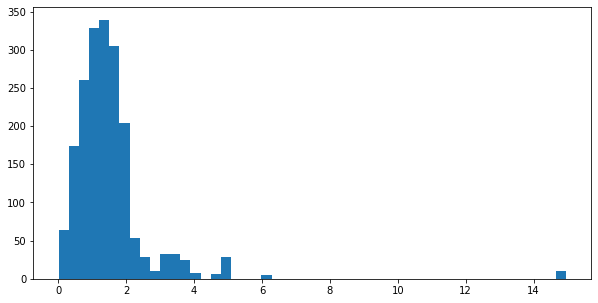

In [18]:
#for UMAP calculate mean point for EMPTY, and calculate distances 
#for all wells and additionally for EMPTY wells (to calculate average distance)
mean_umap1 = principalDf[principalDf['pert_name']=='EMPTY_']['UMAP 1'].mean()
mean_umap2 = principalDf[principalDf['pert_name']=='EMPTY_']['UMAP 2'].mean()
temp = []
temp_empty = []
for i in principalDf.index:
    temp.append(scipy.spatial.distance.euclidean([mean_umap1, mean_umap2], [principalDf.loc[i, 'UMAP 1'], principalDf.loc[i, 'UMAP 2']]))
    if principalDf.loc[i, 'pert_name'] =='EMPTY_':
        temp_empty.append(scipy.spatial.distance.euclidean([mean_umap1, mean_umap2], [principalDf.loc[i, 'UMAP 1'], principalDf.loc[i, 'UMAP 2']]))

plt.figure(figsize=(10,5))
plt.hist(temp, bins=50)

In [19]:
#The arbitary selection here would be to select wells with the distance which exceeds the 95th percentile distance of EMPTY
#append to existing array to plates_wells
idx = list(np.argwhere(np.array(temp) > np.percentile(temp_empty, 95)).flatten())
for idd in idx:
    plates_wells.append((principalDf.loc[idd, 'Plate'], principalDf.loc[idd, 'Well'] )) 


In [20]:
len(set(plates_wells))

411

In [21]:
#Get final candidates

In [22]:
candidates = pd.DataFrame(set(plates_wells), columns =['Plate', 'Well'])
candidates = pd.merge(candidates, principalDf, right_on = ['Plate', 'Well'], left_on = ['Plate', 'Well'] )
candidates

,Plate,Well,pert_name,Replicate,control_corr,UMAP 1,UMAP 2,PCA 1,PCA 2,PCA 3,...,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,PCA 31,PCA 32,control
0,41757,i19,WWTR1_WT,5,0.009776,-17.025049,-10.575418,-22.686230,-214.935715,92.400299,...,50.357597,19.446314,-66.317757,-14.875261,42.652668,-30.873560,-11.074541,-128.038101,136.420853,False
1,41744,l02,CARD11_WT,1,-0.006287,-19.919363,-7.421621,-94.346893,-89.611176,70.120377,...,-35.088593,-148.782135,106.488213,7.961958,-35.793633,29.476313,87.718834,-63.959080,9.884252,False
2,41755,m01,HSP90AA1_WT,3,0.003435,-18.675978,-7.282261,51.607098,-102.008125,148.047821,...,133.062805,109.679489,35.076805,32.551659,-57.267887,-112.926765,98.214699,-89.067451,100.384987,False
3,41755,o17,eGFP_CTRL,17,0.023054,-17.965624,-10.347036,51.407665,-97.121689,-59.151398,...,19.984772,-168.112839,-15.889151,69.971069,-56.810284,22.376209,37.676228,58.207714,-6.944903,False
4,41744,i22,MAP3K7_WT,1,0.005344,-19.404034,-8.586879,28.230087,-122.319969,-58.003105,...,23.901003,-38.345745,6.260012,-60.120586,-58.947491,-35.032879,-99.918388,-33.220879,-2.604552,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,41754,b12,CDC42_Q61L,2,-0.004539,-18.822313,-10.756965,843.648865,-558.599609,124.814110,...,1.323771,-15.275665,-104.721466,54.154636,-109.852394,127.999702,124.531822,81.269020,34.115452,False
407,41744,m16,EMPTY_,26,0.099817,-16.108921,-6.174050,-96.492683,36.382233,-19.324528,...,-3.357642,20.617556,1.434474,-0.835948,-1.559468,-1.069589,0.090241,17.588894,-11.613850,True
408,41744,o19,eGFP_CTRL,3,0.001054,-18.023199,-10.177553,36.364712,-129.634827,-42.856972,...,-41.881516,-219.616943,-33.158073,70.556801,-13.893199,-63.701412,118.060989,17.059582,12.941930,False
409,41757,b12,CDC42_Q61L,5,0.009960,-18.793425,-10.771500,938.835510,-313.364746,340.809998,...,-160.667587,-4.453438,70.459518,274.288116,-144.900925,152.944366,101.542000,212.543716,-83.687088,False


# Final clean-up

In [23]:
#remove controls from candidates and mismatch\truncated
candidates = candidates[~candidates['pert_name'].isin(['EMPTY_', 'Luciferase_CTRL', 'LacZ_CTRL', 'eGFP_CTRL', 'MAPK7_WT.mismatch', 'PRKCE_K437R.mismatch', 'CARD11_F123I.mismatch', 'RB1_WT.1.mismatch', 'JAK2_V617F.mismatch', 'DUSP1_WT.mismatch', 'CHUK_WT.1.mismatch', 'CCNE1_WT.mismatch', 'ERG_truncated'])]
candidates

,Plate,Well,pert_name,Replicate,control_corr,UMAP 1,UMAP 2,PCA 1,PCA 2,PCA 3,...,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,PCA 31,PCA 32,control
0,41757,i19,WWTR1_WT,5,0.009776,-17.025049,-10.575418,-22.686230,-214.935715,92.400299,...,50.357597,19.446314,-66.317757,-14.875261,42.652668,-30.873560,-11.074541,-128.038101,136.420853,False
1,41744,l02,CARD11_WT,1,-0.006287,-19.919363,-7.421621,-94.346893,-89.611176,70.120377,...,-35.088593,-148.782135,106.488213,7.961958,-35.793633,29.476313,87.718834,-63.959080,9.884252,False
2,41755,m01,HSP90AA1_WT,3,0.003435,-18.675978,-7.282261,51.607098,-102.008125,148.047821,...,133.062805,109.679489,35.076805,32.551659,-57.267887,-112.926765,98.214699,-89.067451,100.384987,False
4,41744,i22,MAP3K7_WT,1,0.005344,-19.404034,-8.586879,28.230087,-122.319969,-58.003105,...,23.901003,-38.345745,6.260012,-60.120586,-58.947491,-35.032879,-99.918388,-33.220879,-2.604552,False
5,41756,j17,MAP2K3_WT,4,-0.010240,-16.809021,-8.710117,85.250916,-418.422150,-45.082005,...,21.552095,-102.104599,-28.948406,-172.470261,11.984229,13.389669,-13.051762,-2.850701,114.855942,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,41754,h03,CASP8_WT.2,2,-0.008897,-19.111002,-9.487239,963.683105,-34.032940,373.199921,...,-6.678436,188.711472,-463.163330,-425.555511,-17.914921,-127.319283,-0.068711,-277.953979,-314.710297,False
405,41755,p15,RHOA_T19N,3,-0.003011,-17.380505,-10.085965,147.386612,-255.901520,194.899002,...,-14.080290,159.075745,-141.757202,-251.762482,57.516735,-37.505001,-76.484962,10.076290,-57.835892,False
406,41754,b12,CDC42_Q61L,2,-0.004539,-18.822313,-10.756965,843.648865,-558.599609,124.814110,...,1.323771,-15.275665,-104.721466,54.154636,-109.852394,127.999702,124.531822,81.269020,34.115452,False
409,41757,b12,CDC42_Q61L,5,0.009960,-18.793425,-10.771500,938.835510,-313.364746,340.809998,...,-160.667587,-4.453438,70.459518,274.288116,-144.900925,152.944366,101.542000,212.543716,-83.687088,False


In [24]:
#remove the perturbations with less than 3 replicates left
candidates = candidates[candidates['pert_name'].map(candidates['pert_name'].value_counts()) > 2]
candidates['pert_name'].value_counts()

AKT3_WT.2                     5
BCL2L11_WT                    5
PRKCE_WT.2                    5
CEBPA_WT.2                    5
XBP1_WT.3                     5
CDC42_Q61L                    5
RAC1_T17N                     5
AKT1_E17K                     5
CASP8_WT.2                    5
JUN_WT.2                      5
BRAF_V600E                    5
PRKCE_WT.1                    5
CEBPA_WT.1                    5
MAP3K2_WT.2                   5
CSNK1E_WT.2                   5
WWTR1_WT                      5
JUN_WT.1                      5
RAF1_WT.1                     5
KRAS_G12V                     5
AKT1S1_WT.2                   5
CDKN1A_WT                     5
RAF1_WT.2                     5
HRAS_G12V                     5
PRKACA_WT.2                   5
MAP2K3_WT                     5
CXXC4_WT                      5
RAF1_L613V                    5
NOTCH1_ICN1.1                 5
ATF6_1-373                    5
BRAF_WT.2                     5
MAP3K9_WT                     4
CTNNB1_S

In [25]:
len(candidates['pert_name'].unique())

46

In [26]:
for p in ['BRAF_V600E', 'RAF1_L613V', 'KRAS_G12V', 'CDC42_Q61L', 'AKT3_E17K', 'AKT1_E17K', 'RHOA_Q63L', 'RAC1_Q61L']:
    if p in candidates['pert_name'].unique():
        print(p)

BRAF_V600E
RAF1_L613V
KRAS_G12V
CDC42_Q61L
AKT3_E17K
AKT1_E17K
RHOA_Q63L
RAC1_Q61L


In [27]:
candidates.to_csv('taorf_candidates.csv')